# Introduction
Author: Jimmy Nguyen

In this project, we examine job outcomes of students who graduated from college between 2010 and 2012 from the American Community Survey (ACS). The cleaned dataset comes from [FiveThirtyEight's GitHub repo](https://github.com/fivethirtyeight/data/tree/master/college-majors).

We'll focus on visualizing the data using `pandas` to answer some simple questions.

* Do students in more popular majors make more money?
    * Using scatter plots
* How many majors are predominantly male? Predominantly female?
    * Using histograms
* Which category of majors have the most students?
    * Using bar plots


Columns in the dataset include:

* `Rank` - Rank by median earnings (the dataset is ordered by this column).
* `Major_code` - Major code.
* `Major` - Major description.
* `Major_category` - Category of major.
* `Total` - Total number of people with major.
* `Sample_size` - Sample size (unweighted) of full-time.
* `Men` - Male graduates.
* `Women` - Female graduates.
* `ShareWomen` - Women as share of total.
* `Employed` - Number employed.
* `Median` - Median salary of full-time, year-round workers.
* `Low_wage_jobs` - Number in low-wage service jobs.
* `Full_time` - Number employed 35 hours or more.
* `Part_time` - Number employed less than 35 hours.

In [1]:
# Import data and analysis libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

recent_grads = pd.read_csv("recent-grads.csv")

# Data Exploration

## Initial view
To get a feel of the dataset, we'll display the first row, the first few rows, the last few rows, and some simple descriptive statistics of the numeric data.

In [2]:
recent_grads.iloc[0] # First row

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [3]:
recent_grads.head(5) # First five rows

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [4]:
recent_grads.tail(5) # Last five rows

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [5]:
recent_grads.describe() # Descriptive statistics for numeric columns

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


## Dealing with missing values
For the purposes of our analysis, we'll use rows with complete information only, i.e. a complete case analysis. Based on a quick scan of the numeric columns, there only appears to be 1 missing row out of 173. Let's verify that.

In [6]:
raw_data_count = recent_grads.shape[0] # 173 rows total
recent_grads = recent_grads.dropna()   # drop incomplete rows
cleaned_data_count = recent_grads.shape[0] # 172 rows total

In [7]:
print(raw_data_count - cleaned_data_count, "rows dropped")
print(cleaned_data_count, "rows total")

1 rows dropped
172 rows total


# Plotting Job Outcomes
Next, we generate exploratory plots using `pandas` syntax.

## Scatter plots
We'll use scatterplots to answer the following questions:
* Do students in more popular majors make more money?
* Do students that majored in subjects that were majority female make more money?
* Is there any link between the number of full-time employees and median salary?

### Sample Size vs. Median Salary of Full Time Workers

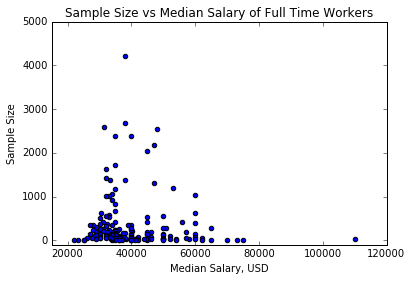

In [8]:
ss_vs_med = recent_grads.plot(x = 'Median', y = 'Sample_size', kind='scatter',
                              xlim = (15000,120000), ylim = (-100,5000), 
                              title = 'Sample Size vs Median Salary of Full Time Workers')
ss_vs_med.set_xlabel("Median Salary, USD")
ss_vs_med.set_ylabel("Sample Size")
plt.show()

### Sample Size vs Unemployment Rate

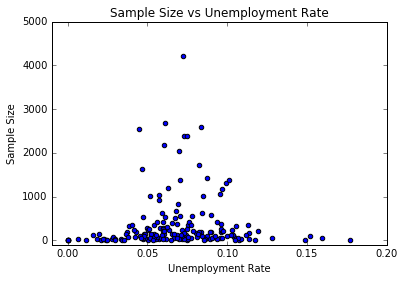

In [9]:
ss_vs_ump = recent_grads.plot(x = 'Unemployment_rate', y = 'Sample_size', kind='scatter',
                              xlim = (-0.01, 0.20), ylim = (-100,5000), 
                              title = 'Sample Size vs Unemployment Rate')
ss_vs_ump.set_xlabel("Unemployment Rate")
ss_vs_ump.set_ylabel("Sample Size")
plt.show()

### Number Employed Full Time vs Median Salary of Full Time

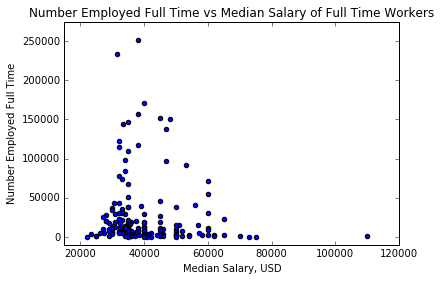

In [10]:
nft_vs_med = recent_grads.plot(x = 'Median', y = 'Full_time', kind='scatter',
                              xlim = (15000,120000), ylim = (-10000, 275000),
                              title = 'Number Employed Full Time vs Median Salary of Full Time Workers')
nft_vs_med.set_xlabel("Median Salary, USD")
nft_vs_med.set_ylabel("Number Employed Full Time")
plt.show()

### Unemployment Rate vs Proportion of Women 

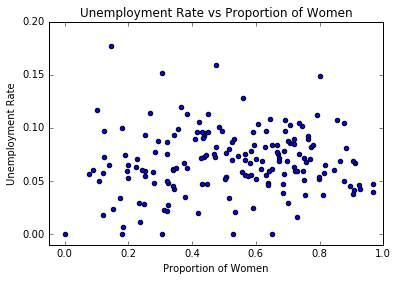

In [11]:
pwm_vs_ump = recent_grads.plot(x = 'ShareWomen', y = 'Unemployment_rate', kind='scatter',
                               xlim = (-0.05,1.0), ylim = (-0.01, 0.20),
                               title = 'Unemployment Rate vs Proportion of Women')
pwm_vs_ump.set_xlabel("Proportion of Women")
pwm_vs_ump.set_ylabel("Unemployment Rate")
plt.show()

### Median Salary of Full Time vs. Proportion of Women

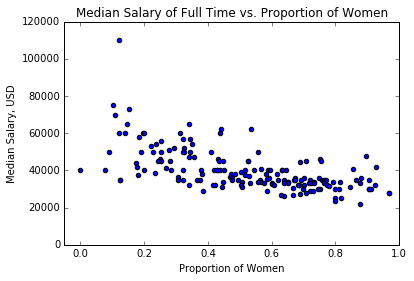

In [12]:
pwm_vs_med = recent_grads.plot(x = 'ShareWomen', y = 'Median', kind='scatter',
                               xlim = (-0.05,1.0),
                               title = 'Median Salary of Full Time vs. Proportion of Women')
pwm_vs_med.set_xlabel("Proportion of Women")
pwm_vs_med.set_ylabel("Median Salary, USD")
plt.show()

### Number of Male Graduates vs Median Salary of Full Time Workers

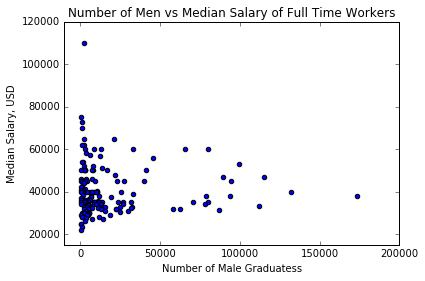

In [13]:
nmn_vs_med = recent_grads.plot(x = 'Men', y = 'Median', kind='scatter',
                               xlim = (-10000, 200000), ylim = (15000, 120000),
                               title = 'Number of Men vs Median Salary of Full Time Workers')
nmn_vs_med.set_xlabel("Number of Male Graduatess")
nmn_vs_med.set_ylabel("Median Salary, USD")
plt.show()

### Number of Female Graduates vs Median Salary of Full Time Workers

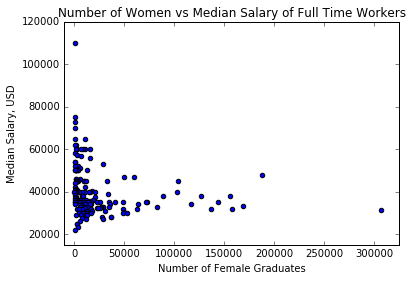

In [14]:
nwm_vs_med = recent_grads.plot(x = 'Women', y = 'Median', kind='scatter',
                               xlim = (-10000, 325000), ylim = (15000, 120000),
                               title = 'Number of Women vs Median Salary of Full Time Workers')
nwm_vs_med.set_xlabel("Number of Female Graduates")
nwm_vs_med.set_ylabel("Median Salary, USD")
plt.show()

### Observations from scatter plots
* Looking across the scatter plots, students in popular majors do not necessarily make more money. In fact, it appears that higher salaries are commanded by majors with fewer students
    * This observation did not change when looking at women and men separately
    * Low salaries ($\lt\$25,000$) were also associated with rarer majors
    * In sum, popular majors made average salaries, while rarer majors either commanded higher salaries or lower salaries, with a bias towards higher salaries
* Median salary appears to be negatively correlated with the proportion of women in the major, meaning that as majors become more women dominated, the median salary tends to be lower
* Most full time median salaries are clustered around \$40,000 regardless of gender
* It appears that higher numbers of full-time employees are weakly associated with lower median salaries

## Histograms
We'll use histograms to answer the following quesitons:

* What percent of majors are predominantly male? Predominantly female?
* What's the most common median salary range?

### Sample Size

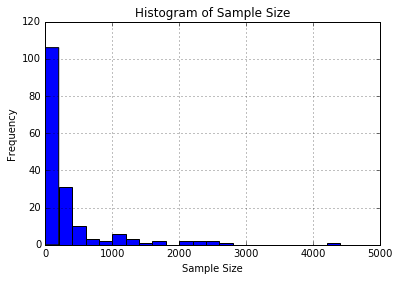

In [15]:
hist_ss = recent_grads["Sample_size"].hist(bins=25, range=(0,5000))
hist_ss.set_title("Histogram of Sample Size")
hist_ss.set_xlabel("Sample Size")
hist_ss.set_ylabel("Frequency")

### Median Salary of Full Time Workers

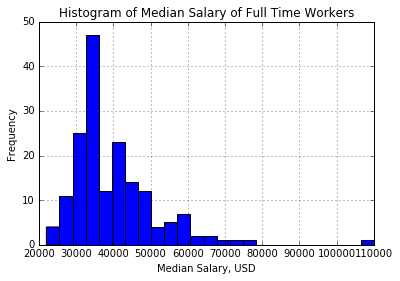

In [16]:
hist_med = recent_grads["Median"].hist(bins=25)
hist_med.set_title("Histogram of Median Salary of Full Time Workers")
hist_med.set_xlabel("Median Salary, USD")
hist_med.set_ylabel("Frequency")

### Number Employed

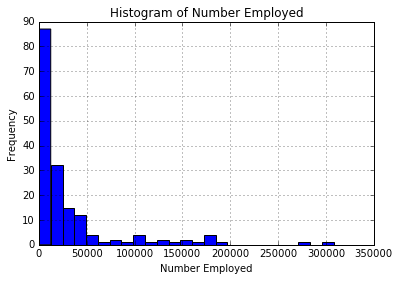

In [17]:
hist_nemp = recent_grads["Employed"].hist(bins=25)
hist_nemp.set_title("Histogram of Number Employed")
hist_nemp.set_xlabel("Number Employed")
hist_nemp.set_ylabel("Frequency")

### Number of Full Time Employees

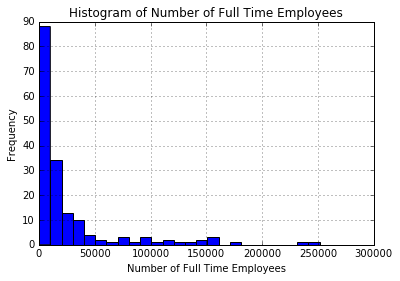

In [18]:
hist_nft = recent_grads["Full_time"].hist(bins=25)
hist_nft.set_title("Histogram of Number of Full Time Employees")
hist_nft.set_xlabel("Number of Full Time Employees")
hist_nft.set_ylabel("Frequency")

### Proportion of Women in Major

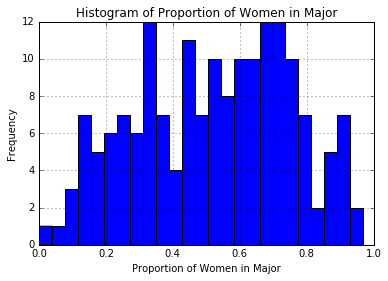

In [19]:
hist_pwm = recent_grads["ShareWomen"].hist(bins=25)
hist_pwm.set_title("Histogram of Proportion of Women in Major")
hist_pwm.set_xlabel("Proportion of Women in Major")
hist_pwm.set_ylabel("Frequency")

### Unemployment Rate

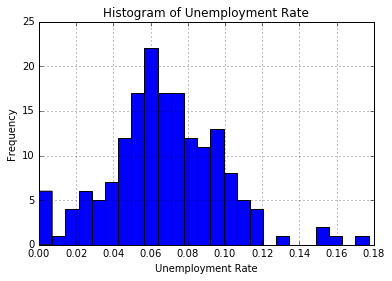

In [20]:
hist_ump = recent_grads["Unemployment_rate"].hist(bins=25)
hist_ump.set_title("Histogram of Unemployment Rate")
hist_ump.set_xlabel("Unemployment Rate")
hist_ump.set_ylabel("Frequency")

### Number of Male Graduates

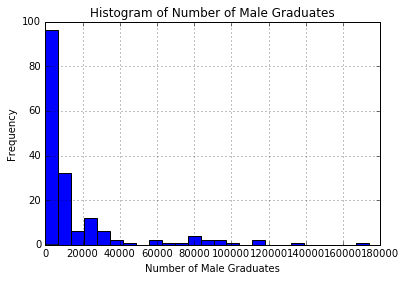

In [21]:
hist_nmn = recent_grads["Men"].hist(bins=25)
hist_nmn.set_title("Histogram of Number of Male Graduates")
hist_nmn.set_xlabel("Number of Male Graduates")
hist_nmn.set_ylabel("Frequency")

### Number of Female Graduates

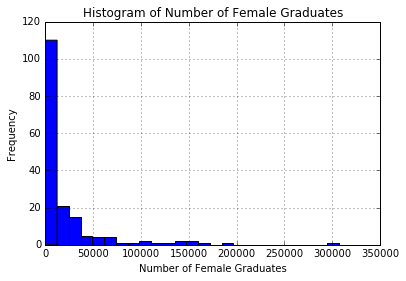

In [22]:
hist_nwn = recent_grads["Women"].hist(bins=25)
hist_nwn.set_title("Histogram of Number of Female Graduates")
hist_nwn.set_xlabel("Number of Female Graduates")
hist_nwn.set_ylabel("Frequency")

### Observations from histograms
* Visually inspecting, at least a third to a half of majors are either male or female dominated, and the rest are roughly split between men and women
* Most college graduates appaer to make between \$30,000 and \$50,000
* Salaries above \$50,000 and below \$30,000 are relatively rare
* Salary, unemployment rate, and proportion of women in major all appear to be roughly normally distributed, while all other histograms appear distributed according to a zero-inflated Poisson

### Scatter Matrix Plots
Scatter matrix plots are another way to explore scatter plots and histograms simultaneously. We'll use them to explore the relationships between sample size, median salary, and unemployment rate.

In [23]:
from pandas.plotting import scatter_matrix

### Sample Size and Median Salary for Full Time Employees

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcdff353860>,
      dtype=object)

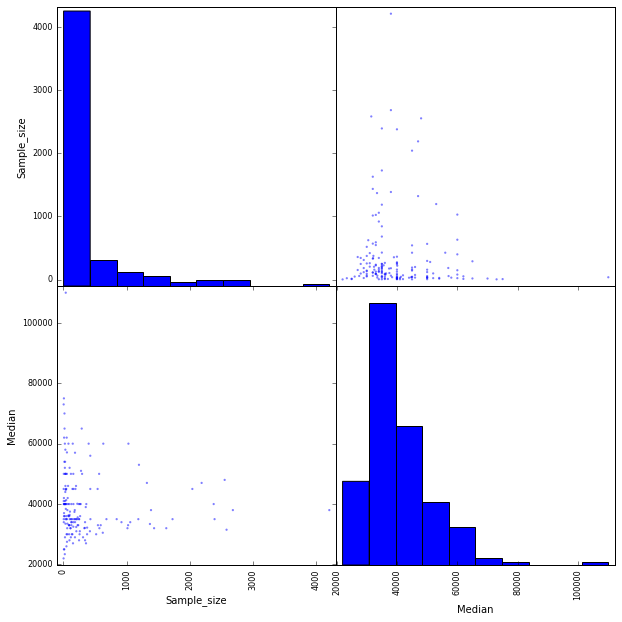

In [24]:
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(10,10))

### Sample Size, Median Salary for Full Time Employees, and Unemployment Rate

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcdff17b470>,
      dtype=object)

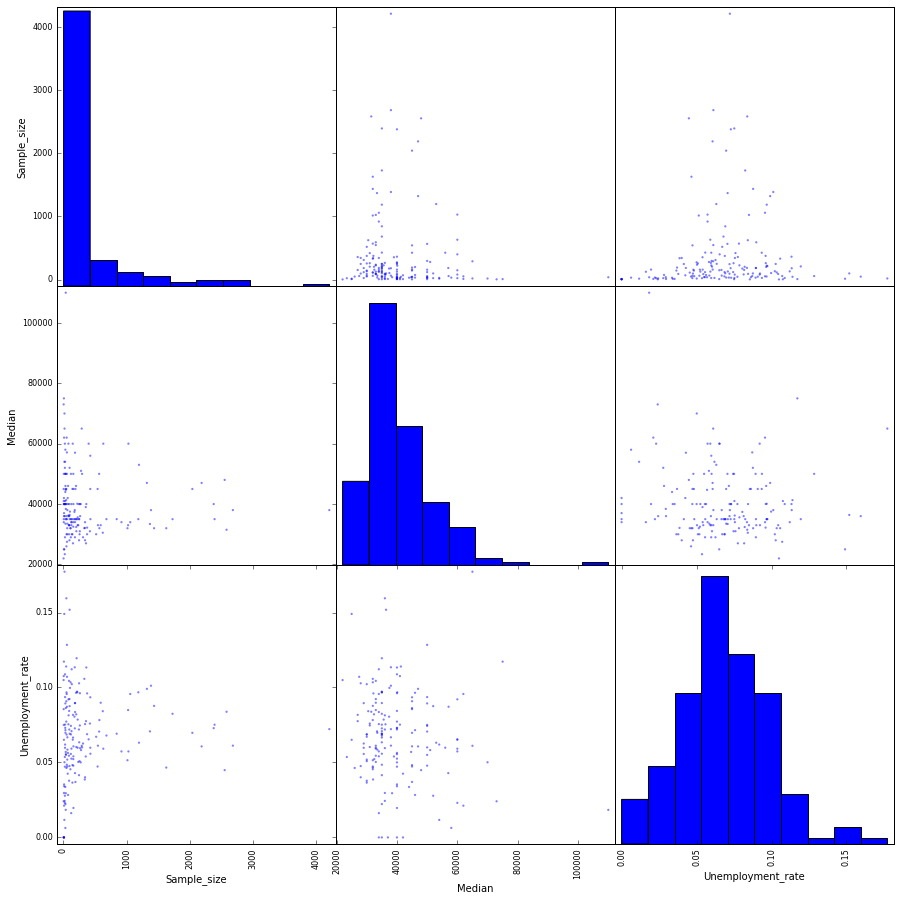

In [25]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(15,15))

### Proportion of Women in Major and Median Salary for Full Time Workers

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcdfee259e8>,
      dtype=object)

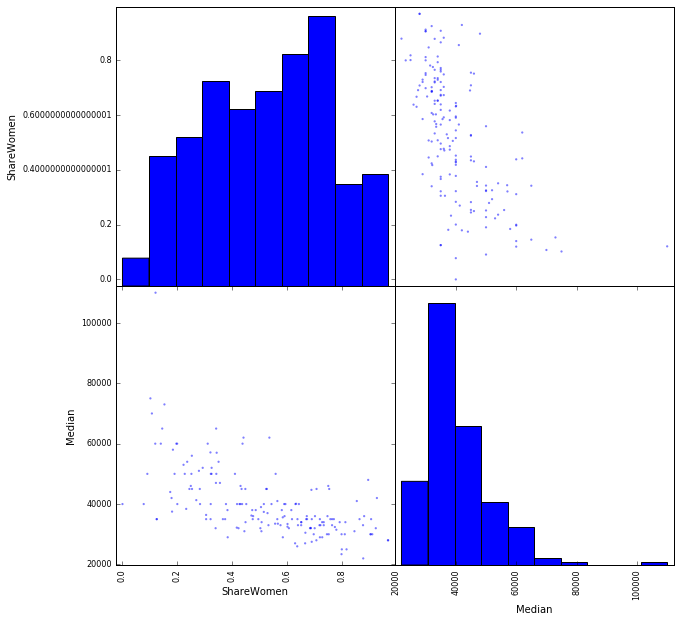

In [26]:
scatter_matrix(recent_grads[['ShareWomen', 'Median']], figsize=(10,10))

### Observations from Scatter Matrix Plots
* The scatter matrix plots provide a more compressed view of the relationships between variables
* The same observations from earlier still appear
    * Unemployment rate appears uncorrelated with the median salary of full time employees
    * Extreme incomes (low or high) coincide with less popular majors
    * Majors with higher ratios of women to men are associated with lower median salaries among full time employees

## Bar Plots
We'll use bar plots to make some comparisons between the top ten majors and bottom ten majors ranked by median earnings:
* how do the proportions of women differ between these groups?
* how do unemployment rates differ?

We'll also answer the cliffhanger at the top about which majors have the most and least number of students in them.

### Top Ten: Proportion of Women in Major

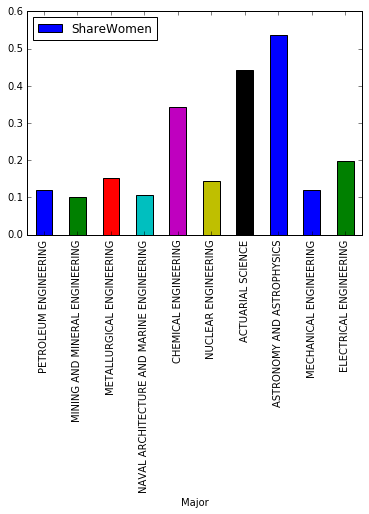

In [27]:
recent_grads[:10].plot.bar(x='Major',  y='ShareWomen')

### Bottom Ten: Proportion of Women in Major

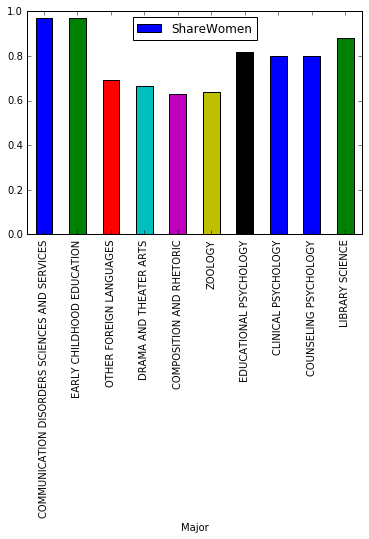

In [28]:
recent_grads[-10:].plot.bar(x='Major',  y='ShareWomen')

### Top Ten: Unemployment Rate

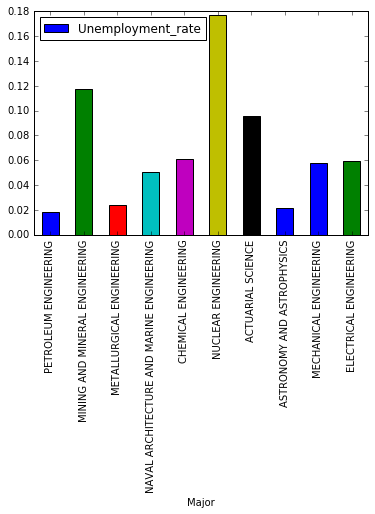

In [29]:
recent_grads[:10].plot.bar(x='Major',  y='Unemployment_rate')

### Bottom Ten: Unemployment Rate

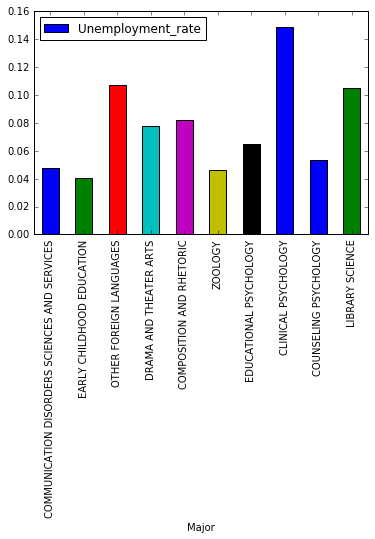

In [30]:
recent_grads[-10:].plot.bar(x='Major',  y='Unemployment_rate')

### Top ten majors by number of students

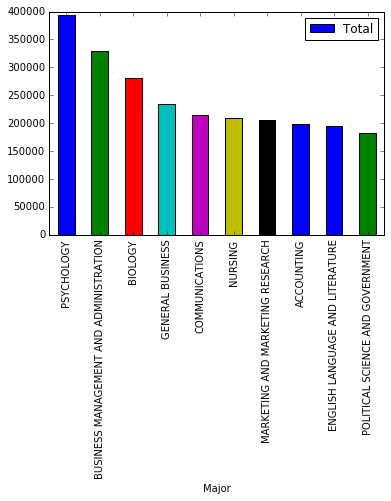

In [31]:
recent_grads.sort_values("Total", ascending=False).iloc[:10].plot.bar(x='Major', y='Total')

### Bottom ten majors by number of students

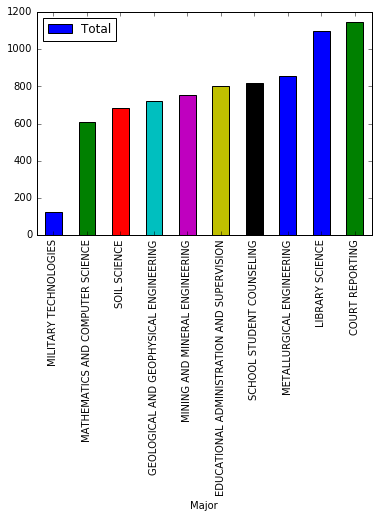

In [32]:
recent_grads.sort_values("Total").iloc[:10].plot.bar(x='Major', y='Total')

### Observations from bar plots
* Majors with the top ten earnings have very few women in them compared to men, and most majors will have less than 50% of women in them, and as litle as 20%-40%
* Majors with the lowest ten earnings have mostly women in them, at 60% or more
* The top ten majors are dominated by specialized engineering fields 
* The bottom ten majors are a mix of fields dealing in education, arts, and psychology
* The top ten and bottom ten have similar rates of unemployment, though there seems to be 2-7% more unemployment in the bottom ten on average
* Nuclear engineering and clinical psychology majors had relatively high levels of unemployment at more than 15% each
* Psychology was the most popular major, whera



## Extra Plots

### Grouped Bar Plot
We can visualize the proportion of women in each major category using simple aggregation and a grouped bar plot.

#### Proportion of Women in Each Major Category

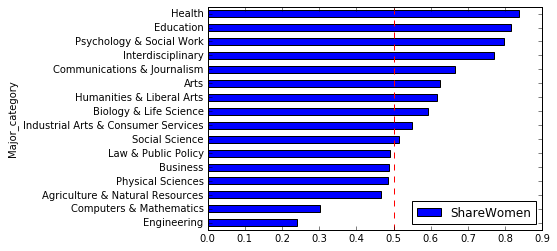

In [70]:
# Recalculate women to men in each major category and plot as horizontal bar
(recent_grads
     .groupby(["Major_category"])
     .sum()
     .reset_index()
     .assign(ShareWomen = lambda x: x.Women / (x.Men + x.Women))
     .sort_values("ShareWomen")
     .plot.barh(x='Major_category', y='ShareWomen', color='blue')
)
plt.axvline(x=0.5, c='r', ls='--')

##### Observations
* The top three female-dominated major categories included health, education, and psychology & social work
* The top three male-dominated major categories included agriculture & natural resources, computers & mathematics, and engineering
* Majors in the humanities surrounding service, writing & communication, and the arts tended to have more females than males
* Majors in the sciences surrounding traditional science and engineering tended to have more males than femalee

### Box Plots
We can use box plots to explore the distribution of median salaries and unemployment rate.

#### Distribution of Median Salaries

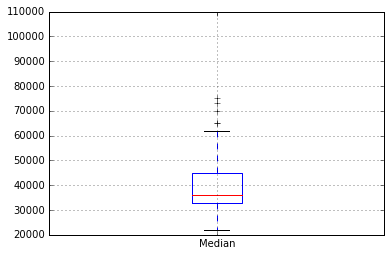

In [75]:
recent_grads.boxplot('Median')

##### Observations
* Salaries of college graduates fell generally between \$30,000 and \$45,000
* There are a handful of majors earning well above \$60,000, which represent outliers past 1.5 times the IQR

#### Distribution of Unemployment Rate

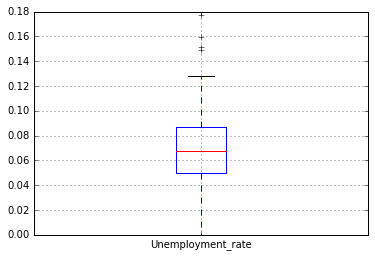

In [78]:
recent_grads.boxplot('Unemployment_rate')

##### Observations
* Unemployment rates for college graduates ranged in general between 5% and 9%
* The relatively equal quartiles is another view of the rough normality of unemployment rate